### 📍 **Importação de Bibliotecas e Módulos**

In [1]:
%pip -q install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df_census = pd.read_csv('../database/census.csv', encoding='ISO-8859-1')

### 📍 **Visualização de Dados**

In [4]:
df_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [6]:
np.unique(df_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

### 📍 **Plotagem Gráfica**

C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

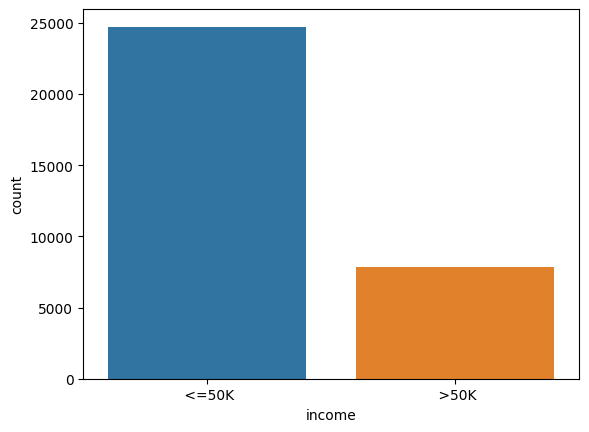

In [7]:
sns.countplot(x = df_census['income']);

In [8]:
graphic5 = px.parallel_categories(df_census, dimensions=['education', 'income'])
graphic5.show()

### 📍 **Divisão das Variáveis**

In [9]:
df_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
X_census = df_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [11]:
y_census = df_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### 📍 **Tratamento de Dados**

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13]
label_encoders = {}

for column in categorical_columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(X_census[:, column])
    X_census[:, column] = label_encoder.fit_transform(X_census[:, column])
    label_encoders[column] = label_encoder

In [14]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
one_hot_encoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [17]:
X_census = one_hot_encoder_census.fit_transform(X_census).toarray()
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [18]:
X_census.shape

(32561, 108)

### 📍**Escalonamento de Atributos**

In [19]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()

X_census = scaler_census.fit_transform(X_census)

### 📍 **Divisão de Teste e Treinamento**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_census_training_set, X_census_test_set, y_census_training_set, y_census_test_set = train_test_split(X_census, y_census, test_size=0.15, random_state = 0)

In [24]:
X_census_training_set.shape, y_census_training_set.shape

((27676, 108), (27676,))

In [26]:
X_census_test_set.shape, y_census_test_set.shape

((4885, 108), (4885,))

### 📍 **Salvando Variáveis no formato pkl**

In [27]:
import pickle

O módulo `pickle` em Python é usado para serializar e desserializar uma estrutura de objeto Python, sendo que "Pickling" é o processo pelo qual uma hierarquia de objetos Python é convertida em um fluxo de bytes, e "unpickling" é a operação inversa, na qual um fluxo de bytes (de um arquivo binário ou objeto semelhante a bytes) é convertido de volta em uma hierarquia de objetos.

In [28]:
with open('census.pkl', mode = 'wb') as f:
    pickle.dump([X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set], f)

Por fim, estou usando o módulo `pickle` para salvar os conjuntos de treinamento e teste em um arquivo chamado `census.pkl`.

- `with open('census.pkl', mode = 'wb') as f:`: Esta linha abre o arquivo `census.pkl` no modo de escrita binária (`wb`) e cria um objeto de arquivo chamado `f`. O uso da instrução `with` garante que o arquivo seja fechado corretamente quando terminar de escrever nele.

- `pickle.dump([X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set], f)`: Esta linha usa a função `dump` do módulo `pickle` para salvar os conjuntos de treinamento e teste em um arquivo. Os conjuntos de treinamento e teste são passados como uma lista para a função `dump`, juntamente com o objeto de arquivo `f`. Isso irá serializar os dados e escrevê-los no arquivo.

Depois de executar este código, foi criado um arquivo chamado `census.pkl` que contém os conjuntos de treinamento e teste. Posteriormente, vou carregar esses dados usando a função `load` do módulo `pickle`.